# Keras 
---


## Keras or TensorFlow ?
- `TensorFlow` is a library that is most commonly used for developing deep learning models.
- But `TensorFlow` is not easy to use.
- `Keras` is a high level api that is built on top of `TensorFlow`.
    - For quick and easy building of deep learning models, it is more convinient to use `Keras`. 
- If we are conducting research and need more control, then `TensorFlow` should be used.

## Importing Keras 
- We will need to import 2 libraries to build a simple Neural Network. `Sequential` and `Dense` 

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Classification 

## Binary Classification 
- We will be using the breast cancer dataset from Scikit-Learn

In [3]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Loading breast cancer data 

In [4]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = pd.Series(cancer.target)

### Defining X and y 

In [5]:
X = df.drop(['target'],axis=1 )
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,stratify=y)  


In [6]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Building Neural Network

In [10]:
X_train.shape

(398, 30)

In [9]:
X_train.shape[1]

30

`add` : This function adds a layer of neurall network in the model. 

`activation` : This is the activation function that we will use. For the output layer, if it is Binary, sigmoid is usually used.

`input_dim` : The input dimension needs to be the same as the number of features (columns) of your input data. 

In [13]:
model = Sequential()
model.add(Dense(2, activation='relu', input_dim=X_train.shape[1] ))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 62        
                                                                 
 dense_1 (Dense)             (None, 4)                 12        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________


`Output Shape` : Number of Output from the layer 

`Param #` : Number of parameters

#### We have to compile the Neural Network we have made the model
`loss` : The method we are using to measure the Neural Network

`optimizer` : The method that is used to reduce the loss value. Example: Gradient Descent. 
**adam** is said to be the best.

In [24]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Fitting Neural Network
`batch_size` : The size of the data that is used before checking the loss and updating the model parameters

`epochs` : The number of times the algorithm will train through the whole dataset

In [25]:
%%time
nn = model.fit(X_train,
          y_train,
         validation_data = (X_test, y_test),
         batch_size=None,
         epochs = 100)

Epoch 1/100
13/13 [==============================] - 2s 52ms/step - loss: 0.2746 - accuracy: 0.8970 - val_loss: 0.2658 - val_accuracy: 0.8947
Epoch 2/100
13/13 [==============================] - 0s 11ms/step - loss: 0.2882 - accuracy: 0.8693 - val_loss: 0.2697 - val_accuracy: 0.8889
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2371 - accuracy: 0.9045 - val_loss: 0.2826 - val_accuracy: 0.8713
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.2346 - accuracy: 0.9070 - val_loss: 0.2679 - val_accuracy: 0.8947
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2273 - accuracy: 0.9095 - val_loss: 0.2592 - val_accuracy: 0.8889
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2304 - accuracy: 0.9121 - val_loss: 0.2923 - val_accuracy: 0.8713
Epoch 7/100
13/13 [==============================] - 0s 6ms/step - loss: 0.2456 - accuracy: 0.8995 - val_loss: 0.2920 - val_accuracy: 0.8713
Epoch 8/100

In [43]:
#nn.history

In [44]:
nn.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [45]:
#nn.history['accuracy']

### Plotting Accuracy 

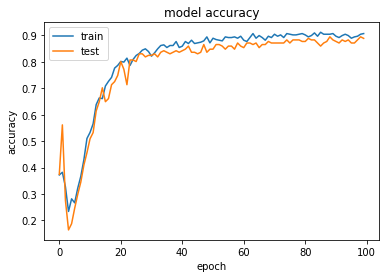

In [19]:
plt.plot(nn.history['accuracy'])
plt.plot(nn.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Plotting loss

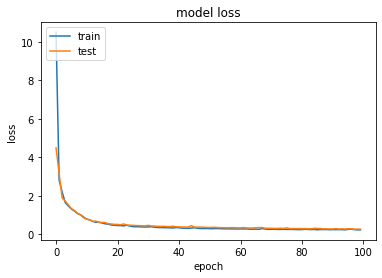

In [20]:
plt.plot(nn.history['loss'])
plt.plot(nn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Predicting  using Neural Network

In [29]:
X_test[:1]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
470,9.667,18.49,61.49,289.1,0.08946,0.06258,0.02948,0.01514,0.2238,0.06413,...,11.14,25.62,70.88,385.2,0.1234,0.1542,0.1277,0.0656,0.3174,0.08524


In [33]:
import numpy as np

In [36]:
## Make prediction
np.argmax(model.predict(X_test[:1]), axis=-1)


array([0])

### References
- [Keras video playlist DeepLizard (video playlist)](https://www.youtube.com/playlist?list=PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL)

- [TensorFlow or Keras? Which one should I learn? (article)](https://medium.com/implodinggradients/tensorflow-or-keras-which-one-should-i-learn-5dd7fa3f9ca0)

- [Keras Parameters Explanation (article)](https://medium.com/@zhang_yang/number-of-parameters-in-dense-and-convolutional-neural-networks-34b54c2ec349)

- [How to choose an optimizer (article)](https://www.dlology.com/blog/quick-notes-on-how-to-choose-optimizer-in-keras/)
- [Optimizers - EXPLAINED! (video)](https://www.youtube.com/watch?v=mdKjMPmcWjY&ab_channel=CodeEmporium)